In this notebook we provide some basic visualizations of Gaussian process regression, using the pykrige and sklearn libraries.

In the making is a demonstration of the convergence of wide neural networks to Gaussian processes.

First we examine Gaussian process regression for single variable, where it is easier to visualize the error bars.

source for the first demonstration: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html 

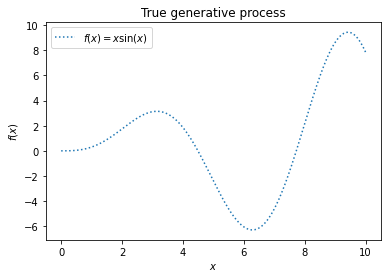

In [12]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(np.sin(X) - X*np.cos(X))


import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


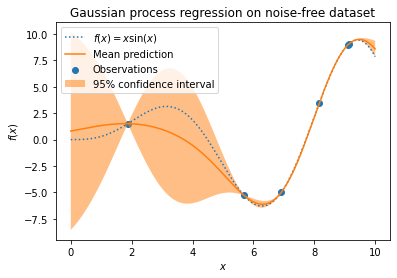

In [21]:


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

Our second demonstration looks at Gaussian processes in action on a two-dimensional field estimation 

<ipython-input-32-de87eae660af>:26: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(label="Value",cmap='viridis')


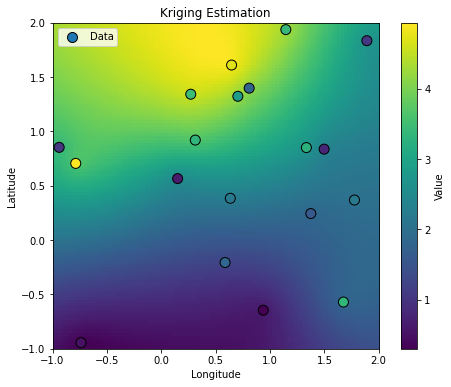

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# Create a synthetic dataset (longitude, latitude, value)
np.random.seed(0)
num_data_points = 19
data = np.column_stack([
    np.random.uniform(-1, 2, num_data_points),  # Longitude
    np.random.uniform(-1, 2, num_data_points),  # Latitude
    np.random.uniform(0, 5, num_data_points)   # Value
])

# Define the grid over which to perform kriging
gridx = np.linspace(-1, 2, 100)
gridy = np.linspace(-1, 2, 100)

# Create an Ordinary Kriging object and fit the data
ok = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model="linear")
z, ss = ok.execute("grid", gridx, gridy)

# Plot the kriging estimate
plt.figure(figsize=(8, 6))
plt.imshow(z, cmap='viridis',origin="lower", extent=(gridx.min(), gridx.max(), gridy.min(), gridy.max()))
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis', s=100, marker="o", edgecolor="k", label="Data")
plt.colorbar(label="Value",cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Kriging Estimation")
plt.legend()
plt.show()


The following snippet is the same code as before but we don't set a random seed. 
Notice how, on certain (if not most) runs, the field estimate will be trivial. 
This is because the matrix inversion in the Kriging solution is acting on a singular matrix. 
Note that if you change the variogram model, this might change the invertibility of that solutions matrix.

<ipython-input-36-582ec01fe293>:23: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(label="Value",cmap='viridis')


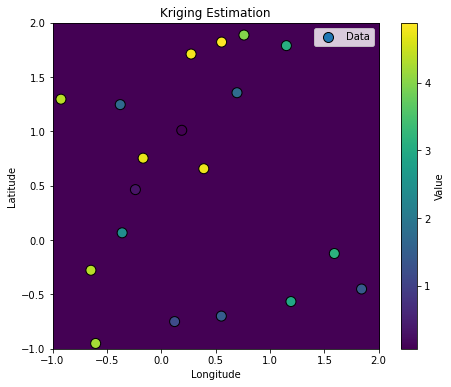

In [36]:
# Create a synthetic dataset (longitude, latitude, value)

#### NO RANDOM SEED    np.random.seed(0)
num_data_points = 19
data = np.column_stack([
    np.random.uniform(-1, 2, num_data_points),  # Longitude
    np.random.uniform(-1, 2, num_data_points),  # Latitude
    np.random.uniform(0, 5, num_data_points)   # Value
])

# Define the grid over which to perform kriging
gridx = np.linspace(-1, 2, 100)
gridy = np.linspace(-1, 2, 100)

# Create an Ordinary Kriging object and fit the data
ok = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model="linear")
z, ss = ok.execute("grid", gridx, gridy)

# Plot the kriging estimate
plt.figure(figsize=(8, 6))
plt.imshow(z, cmap='viridis',origin="lower", extent=(gridx.min(), gridx.max(), gridy.min(), gridy.max()))
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis', s=100, marker="o", edgecolor="k", label="Data")
plt.colorbar(label="Value",cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Kriging Estimation")
plt.legend()
plt.show()
